# Seph's Kinematic Model

## Setup
Install and import necessary Python libraries.

In [8]:
%%capture
%pip install numpy matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Define the Kinematic Model

In [6]:
# Define body part lengths
torso_height = 0.45  # Torso height in meters
thigh_length = 0.40  # Thigh length in meters
shank_length = 0.285  # Shank length in meters
arm_length = 0.3  # Arm length in meters (shoulder to elbow)
forearm_length = 0.25  # Forearm length in meters (elbow to hand

In [7]:
# Define the angles for the joints
hip_angle = np.radians(10)  # Slight forward tilt for the hip
knee_angle = np.radians(20)  # Knees slightly bent forward
shoulder_angle = np.radians(20)  # Arms slightly angled away from the body
elbow_angle = np.radians(30)  # Elbows slightly bent

## Forward Kinematics Calculations

In [8]:
def calculate_joint_positions(hip_angle, knee_angle):
    hip_position = np.array([0, 0, 0])  # Hip at origin
    knee_position = hip_position + np.array([0, thigh_length * np.sin(hip_angle), -thigh_length * np.cos(hip_angle)])
    foot_position = knee_position + np.array([0, shank_length * np.sin(knee_angle), -shank_length * np.cos(knee_angle)])
    return hip_position, knee_position, foot_position

# Define the hip and knee angles in radians
hip_angle = np.radians(10)  # Slight forward tilt for the hip
knee_angle = np.radians(20)  # Knees slightly bent forward

# Calculate joint positions for left and right legs
left_hip_pos, left_knee_pos, left_foot_pos = calculate_joint_positions(hip_angle, knee_angle)
right_hip_pos, right_knee_pos, right_foot_pos = calculate_joint_positions(-hip_angle, knee_angle)  # Negative angle for the right leg

# Adjust the hip positions to be wider apart
left_hip_pos[0] -= 0.1  # Move left hip to the left
right_hip_pos[0] += 0.1  # Move right hip to the right

# Define the torso, neck, and head positions (as previously defined)
torso_pos = np.array([0, 0, 0.45])
neck_pos = np.array([0, 0, torso_pos[2] + 0.1])
head_pos = np.array([0, 0, neck_pos[2] + 0.15])

## Plot the Robot's Mobility

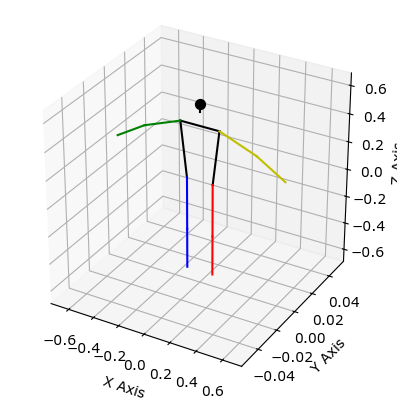

In [9]:
# Define the positions of the joints
torso_pos = np.array([0, 0, torso_height])
left_hip_pos = np.array([-0.1, 0, torso_height - thigh_length * np.cos(hip_angle)])
right_hip_pos = np.array([0.1, 0, torso_height - thigh_length * np.cos(hip_angle)])
left_knee_pos = left_hip_pos + np.array([0, 0, -thigh_length * np.cos(knee_angle)])
right_knee_pos = right_hip_pos + np.array([0, 0, -thigh_length * np.cos(knee_angle)])
left_foot_pos = left_knee_pos + np.array([0, 0, -shank_length])
right_foot_pos = right_knee_pos + np.array([0, 0, -shank_length])
left_shoulder_pos = np.array([-0.15, 0, torso_height])
right_shoulder_pos = np.array([0.15, 0, torso_height])
left_elbow_pos = left_shoulder_pos + np.array([-arm_length * np.cos(shoulder_angle), 0, -arm_length * np.sin(shoulder_angle)])
right_elbow_pos = right_shoulder_pos + np.array([arm_length * np.cos(shoulder_angle), 0, -arm_length * np.sin(shoulder_angle)])
left_hand_pos = left_elbow_pos + np.array([-forearm_length * np.cos(elbow_angle), 0, -forearm_length * np.sin(elbow_angle)])
right_hand_pos = right_elbow_pos + np.array([forearm_length * np.cos(elbow_angle), 0, -forearm_length * np.sin(elbow_angle)])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the torso
ax.plot([left_shoulder_pos[0], right_shoulder_pos[0]], [left_shoulder_pos[1], right_shoulder_pos[1]], [left_shoulder_pos[2], right_shoulder_pos[2]], 'k-')
ax.plot([left_shoulder_pos[0], left_hip_pos[0]], [left_shoulder_pos[1], left_hip_pos[1]], [left_shoulder_pos[2], left_hip_pos[2]], 'k-')
ax.plot([right_shoulder_pos[0], right_hip_pos[0]], [right_shoulder_pos[1], right_hip_pos[1]], [right_shoulder_pos[2], right_hip_pos[2]], 'k-')

# Plot limbs
ax.plot([left_hip_pos[0], left_knee_pos[0]], [left_hip_pos[1], left_knee_pos[1]], [left_hip_pos[2], left_knee_pos[2]], 'b-')
ax.plot([left_knee_pos[0], left_foot_pos[0]], [left_knee_pos[1], left_foot_pos[1]], [left_knee_pos[2], left_foot_pos[2]], 'b-')
ax.plot([right_hip_pos[0], right_knee_pos[0]], [right_hip_pos[1], right_knee_pos[1]], [right_hip_pos[2], right_knee_pos[2]], 'r-')
ax.plot([right_knee_pos[0], right_foot_pos[0]], [right_knee_pos[1], right_foot_pos[1]], [right_knee_pos[2], right_foot_pos[2]], 'r-')
ax.plot([left_shoulder_pos[0], left_elbow_pos[0]], [left_shoulder_pos[1], left_elbow_pos[1]], [left_shoulder_pos[2], left_elbow_pos[2]], 'g-')
ax.plot([left_elbow_pos[0], left_hand_pos[0]], [left_elbow_pos[1], left_hand_pos[1]], [left_elbow_pos[2], left_hand_pos[2]], 'g-')
ax.plot([right_shoulder_pos[0], right_elbow_pos[0]], [right_shoulder_pos[1], right_elbow_pos[1]], [right_shoulder_pos[2], right_elbow_pos[2]], 'y-')
ax.plot([right_elbow_pos[0], right_hand_pos[0]], [right_elbow_pos[1], right_hand_pos[1]], [right_elbow_pos[2], right_hand_pos[2]], 'y-')

# Plot the neck and head as a line and a point
neck_pos = np.array([0, 0, torso_height + 0.1])
head_pos = np.array([0, 0, torso_height + 0.1 + 0.05])
ax.plot([neck_pos[0], head_pos[0]], [neck_pos[1], head_pos[1]], [neck_pos[2], head_pos[2]], 'k-')
ax.scatter(head_pos[0], head_pos[1], head_pos[2], color='k', s=50)

# Set axes labels and show plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_box_aspect([1,1,1])  # Equal aspect ratio

plt.show()

## Experimentation and Refinement
Modify joint angles and replot to explore different robot poses.